# Drug Recommendation System Based On Sentiment Analysis Of Drug Reviews Using Machine Learning

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("drugsComTest_raw.csv")
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


# Exploratory Data Analysis 

In [3]:
data.shape

(53766, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [5]:
data.describe()

,uniqueID,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [6]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.shape

(53471, 7)

In [9]:
data = data[['condition','review','rating','drugName']]
data.head()

,condition,review,rating,drugName
0,Depression,"""I&#039;ve tried a few antidepressants over th...",10,Mirtazapine
1,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,Mesalamine
2,Urinary Tract Infection,"""Quick reduction of symptoms""",9,Bactrim
3,Weight Loss,"""Contrave combines drugs that were used for al...",9,Contrave
4,Birth Control,"""I have been on this birth control for one cyc...",9,Cyclafem 1 / 35


In [10]:
data['rating'].unique()

array([10,  8,  9,  4,  6,  7,  2,  1,  3,  5], dtype=int64)

# Data Preprocessing

In [11]:
data['review'] = data['review'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [12]:
data = data[data['rating'] != 4]

In [13]:
data['sentiment'] = data['rating'].apply(lambda rating: 1 if rating > 4 else 0)

In [14]:
data['review'] = data['review'].str.lower()

In [15]:
data.head()

,condition,review,rating,drugName,sentiment
0,Depression,i039ve tried a few antidepressants over the ye...,10,Mirtazapine,1
1,"Crohn's Disease, Maintenance",my son has crohn039s disease and has done very...,8,Mesalamine,1
2,Urinary Tract Infection,quick reduction of symptoms,9,Bactrim,1
3,Weight Loss,contrave combines drugs that were used for alc...,9,Contrave,1
4,Birth Control,i have been on this birth control for one cycl...,9,Cyclafem 1 / 35,1


# Train Test Split

In [16]:
X = data['review']
Y = data['sentiment']

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=44)

In [18]:
from scipy.sparse import hstack

In [19]:
TF = TfidfVectorizer(stop_words='english')
CV = CountVectorizer(stop_words='english')

X_train_tf = TF.fit_transform(X_train)
X_train_cv = CV.fit_transform(X_train)

In [20]:
X_train_combined = hstack([X_train_tf,X_train_cv])

# Model Building and Training

In [21]:
RF = RandomForestClassifier(random_state=44,n_estimators=100)
RF.fit(X_train_combined,Y_train)

RandomForestClassifier(random_state=44)

In [22]:
X_test_tf = TF.transform(X_test)
X_test_cv = CV.transform(X_test)

X_test_combined = hstack([X_test_tf,X_test_cv])

# Prediction and Evaluation of the Model

In [23]:
Y_pred = RF.predict(X_test_combined)

In [24]:
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 score:", f1)
print("Precision:", precision)

Accuracy: 0.8352305614508971
Recall: 0.8352305614508971
F1 score: 0.7992436140503799
Precision: 0.8513729366965544


# Recommendation System 

In [25]:
condition = input("Enter a medical condition: ")
filtered_reviews = data[data['condition'].str.lower() == condition.lower()]['review'].values

if len(filtered_reviews) == 0:
    print("No drugs found for the specified condition.")
else:
    filtered_X_tfidf = TF.transform(filtered_reviews)
    filtered_X_count = CV.transform(filtered_reviews)
    filtered_X_combined = hstack([filtered_X_tfidf, filtered_X_count])

 
    predicted_sentiments_combined = RF.predict(filtered_X_combined)
    

    drug_sentiment_scores_combined = {}
    for i, review in enumerate(filtered_reviews):
        drug_df = data[data['review'] == review]['drugName']
        if not drug_df.empty:
            drug = drug_df.iloc[0]
            if drug not in drug_sentiment_scores_combined:
                drug_sentiment_scores_combined[drug] = 0
            if predicted_sentiments_combined[i] > 5:
                drug_sentiment_scores_combined[drug] += 1
            elif predicted_sentiments_combined[i] < 5:
                drug_sentiment_scores_combined[drug] -= 1

    if len(drug_sentiment_scores_combined) == 0:
        print("No drugs found for the specified condition.")
    else:
        sorted_drugs_combined = sorted(drug_sentiment_scores_combined.items(), key=lambda x: x[1], reverse=True)
        top_drugs_combined = [drug for drug, _ in sorted_drugs_combined][:5]
        print(f"Top drugs for {condition}: {', '.join(top_drugs_combined)}")

Enter a medical condition: ADHD
Top drugs for ADHD: Ritalin-SR, Pristiq, Budeprion XL, Cylert, Modafinil


# Data Visualization 

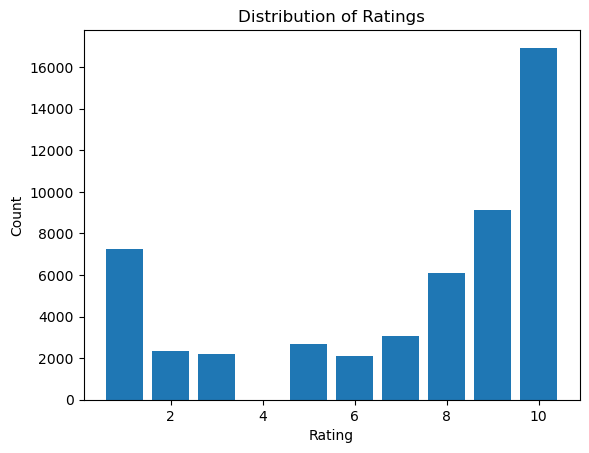

In [26]:
rating_counts = data['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

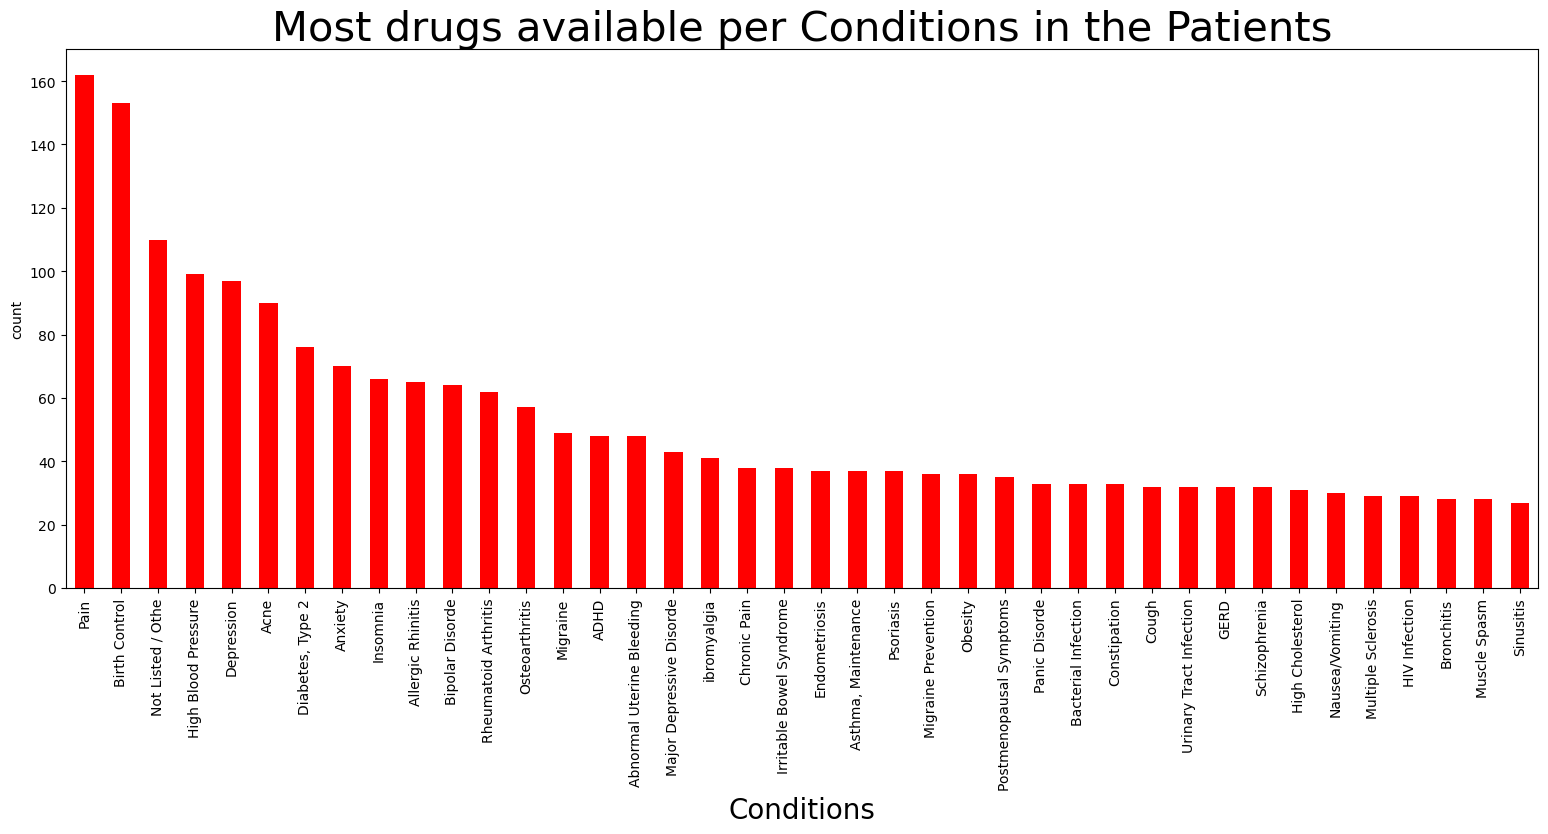

In [27]:
data.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'red')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()